# Proyecto Kaggle - Airbnb

## Importación de librerías y datos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
import numpy as np
import datetime
from dateutil.relativedelta import relativedelta

In [2]:
air = pd.read_csv('airbnb_data.csv')
air.shape

(28877, 28)

## Limpieza

In [3]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28877 entries, 0 to 28876
Data columns (total 28 columns):
property_type             28877 non-null object
room_type                 28877 non-null object
amenities                 28877 non-null object
accommodates              28877 non-null int64
bathrooms                 28877 non-null float64
bed_type                  28877 non-null object
cancellation_policy       28877 non-null object
cleaning_fee              28877 non-null bool
city                      28877 non-null object
description               28877 non-null object
first_review              28877 non-null object
host_has_profile_pic      28877 non-null object
host_identity_verified    28877 non-null object
host_response_rate        28877 non-null object
host_since                28877 non-null object
instant_bookable          28877 non-null object
last_review               28877 non-null object
latitude                  28877 non-null float64
longitude                 28

In [4]:
air.head()

,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,...,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,price
0,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,Enjoy travelling during your stay in Manhattan...,...,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0,169.0
1,Apartment,Private room,"{TV,""Wireless Internet"",Heating,""Smoke detecto...",2,1.0,Real Bed,strict,True,SF,Beautiful private room overlooking scenic view...,...,-122.429526,Comfort Suite San Francisco,Noe Valley,3,100.0,https://a0.muscache.com/im/pictures/82509143-4...,94131,1.0,1.0,85.0
2,Condominium,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Wheelchair...",2,1.0,Real Bed,moderate,True,LA,Arguably the best location (and safest) in dow...,...,-118.260439,"Near LA Live, Staple's. Starbucks inside. OWN ...",Downtown,9,93.0,https://a0.muscache.com/im/pictures/61bd05d5-c...,90015,1.0,1.0,120.0
3,House,Private room,"{TV,""Cable TV"",""Wireless Internet"",""Pets live ...",2,1.0,Real Bed,moderate,True,SF,Garden Studio with private entrance from the s...,...,-122.501095,Cozy Garden Studio - Private Entry,Richmond District,159,99.0,https://a0.muscache.com/im/pictures/0ed6c128-7...,94121,1.0,1.0,120.0
4,Apartment,Private room,"{Internet,""Wireless Internet"",""Air conditionin...",2,1.0,Real Bed,strict,True,NYC,This is a bright bedroom in an historic buildi...,...,-73.983880,Large East Village Bedroom To Let!,Alphabet City,82,93.0,https://a0.muscache.com/im/pictures/21726900/1...,10009.0,1.0,1.0,100.0


### Property Type

In [5]:
prop_v_price = air.pivot_table(index = 'property_type', values = 'price', aggfunc = 'mean')
prop_count = air.pivot_table(index = 'property_type', values = 'room_type', aggfunc = 'count')
prop_v_price = prop_count.join(prop_v_price, on = 'property_type').sort_values('price',ascending=False)

In [6]:
prop_v_price.describe()

,room_type,price
count,30.000000,30.000000
mean,962.566667,173.185714
std,3535.770176,136.809867
min,1.000000,47.016393
25%,4.750000,107.349042
50%,29.000000,136.950000
75%,202.000000,180.750000
max,18543.000000,797.500000


In [7]:
prop_v_price.shape

(30, 2)

In [8]:
prop_v_price

,room_type,price
property_type,,
Treehouse,2,797.500000
Villa,54,344.925926
Timeshare,26,316.461538
Castle,9,254.333333
Tipi,3,232.333333
Boat,22,222.772727
Loft,552,192.530797
Vacation home,4,181.000000
Earth House,2,180.000000


Se reducirán las categorías de property_type, agrupando las que están arriba del percentil 75 como "Luxury", y las que están debajo del percentil 25 como "Low". Adicionalmente, se agruparán dentro de la categoría 'Other', a todas los tipos con baja frecuencia, que no estén en los dos conjuntos definidos anteriormente.

In [9]:
luxury = ['Treehouse','Villa','Timeshare','Castle','Tipi','Boat','Loft','Vacation home']
low = ['Cabin','Bed & Breakfast','Yurt','Camper/RV','Hut','Tent','Hostel','Dorm']
other = ['Guest suite','In-law','Boutique hotel','Serviced apartment','Chalet','Cave','Earth House','Train']

In [10]:
air.property_type = air.property_type.apply(lambda x : 'Luxury' if x in luxury else x)\
                                     .apply(lambda x : 'Low' if x in low else x)\
                                     .apply(lambda x : 'Other' if x in other else x)

In [11]:
air.property_type.value_counts()

Apartment      18543
House           6655
Condominium     1081
Townhouse        720
Luxury           672
Other            413
Low              379
Guesthouse       248
Bungalow         166
Name: property_type, dtype: int64

A continuación, se generarán dummies para property_value, y se eliminará la columna original.

In [12]:
air_prop_type = pd.get_dummies(air.property_type, drop_first=True)
air = pd.concat([air,air_prop_type],axis = 1)
air.drop('property_type',axis = 1,inplace = True)

### Room Type

In [13]:
air.room_type.value_counts()

Entire home/apt    16158
Private room       11993
Shared room          726
Name: room_type, dtype: int64

In [14]:
room_v_price = air.pivot_table(index = 'room_type', values = 'price', aggfunc = 'mean')
room_v_price

,price
room_type,
Entire home/apt,198.166790
Private room,81.995331
Shared room,52.694215


Se identifica que el precio promedio es de casi el doble para la categoría 'Entire home/apt' vs 'Private room', mientras que 'shared' es poco más de la mitad. Se asignarán valores numéricos proporcionales, para evitar agregar columnas.

In [15]:
entire = room_v_price.loc['Entire home/apt']/room_v_price.loc['Entire home/apt']
private = room_v_price.loc['Private room']/room_v_price.loc['Entire home/apt']
shared = room_v_price.loc['Shared room']/room_v_price.loc['Entire home/apt']

In [16]:
air.room_type = air.room_type.apply(lambda x : entire[0] if x == 'Entire home/apt' else x)\
            .apply(lambda x : private[0] if x == 'Private room' else x)\
            .apply(lambda x : shared[0] if x == 'Shared room' else x)

In [17]:
air.room_type.value_counts()

1.000000    16158
0.413769    11993
0.265908      726
Name: room_type, dtype: int64

### Amenities

Revisando los valores de esta columna, se identifica que son valores string de items con los que cuentan las propiedades rentadas. Con el fin de no eliminar la columna por el momento, se procederá a medir la longitud del texto, asumiendo que entre más largo, más amenidades tiene.
Sin embargo, dentro de los valores revisados, se identificó que existen los siguientes textos: "translation missing: en.hosting_amenity_49" y "translation missing: en.hosting_amenity_50, y se asume que son errores de captura en la aplicación. Antes de medir la longitud de textos, se eliminan dichas frases.

In [18]:
air.amenities = air.amenities.str.replace('"translation missing: en.hosting_amenity_49"','')\
                             .str.replace('"translation missing: en.hosting_amenity_50"','').str.split(',')

In [19]:
amen = pd.DataFrame(air.amenities.apply(lambda x : len(x)))
amen.columns = ['amenity_items']

In [20]:
air = pd.concat([air,amen],axis = 1)

In [21]:
air.drop('amenities',axis = 1, inplace = True)

### Bed Type

In [22]:
air.bed_type.value_counts()

Real Bed         28092
Futon              319
Pull-out Sofa      246
Airbed             146
Couch               74
Name: bed_type, dtype: int64

De la revisión del conteo de valores, se identifica que la mayor parte de los datos tiene "Real Bed", por lo que se decide eliminar la columna, toda vez que su información no aporta información.

In [23]:
air.drop('bed_type',axis = 1, inplace = True)

### Cancellation Policy

In [24]:
air.cancellation_policy.value_counts()

strict             14816
moderate            8492
flexible            5539
super_strict_30       25
super_strict_60        5
Name: cancellation_policy, dtype: int64

Se identifica que de las 5 cateogorías, 3 son muy parecidas (las 'strict'), por lo que se integran en una sola.

In [25]:
air.cancellation_policy = air.cancellation_policy.str.replace('super_strict_30','strict')\
                             .str.replace('super_strict_60','strict')

In [28]:
air_canc_pol = pd.get_dummies(air.cancellation_policy, drop_first=True)
air = pd.concat([air,air_canc_pol],axis = 1)
air.drop('cancellation_policy',axis = 1,inplace = True)

### Cleaning Fee

Esta columna cuenta con valores booleanos, por lo que se genera una columna de dummies, en donde 1 es True y 0 es False.

In [29]:
air_clean_fee = pd.get_dummies(air.cleaning_fee, drop_first=True)
air_clean_fee.columns = ['clean_fee']
air = pd.concat([air,air_clean_fee],axis = 1)
air.drop('cleaning_fee',axis = 1,inplace = True)

### City

En esta columna, se encuentra que hay pocos valores de ciudades, lo cual es óptimo para hacer columnas de dummies, ya que se estima que esta columna es muy importante para la predicción de los precios.

In [30]:
air_city = pd.get_dummies(air.city, drop_first=True)
air = pd.concat([air,air_city],axis = 1)
air.drop('city',axis = 1,inplace = True)

### Description

Para este caso, se realiza un análisis similar al de "amenities".
Se encuentra que la mayor parte de la información está contenida en strings de 1000, por lo que se considera que la columna no tendrá valor en el modelo.

In [31]:
desc = pd.DataFrame(air.description.apply(lambda x : len(x)))
desc.columns = ['desc_len']
desc.desc_len.value_counts()

1000    19253
250        83
499        64
500        58
497        55
        ...  
40          1
26          1
10          1
41          1
89          1
Name: desc_len, Length: 987, dtype: int64

In [32]:
air.drop('description',axis = 1, inplace = True)

### Columnas de fechas

Existen tres columnas que contienen datos de fechas (en string): 'First Review', 'Last_review' y 'Host Since'.
Dado que no estamos interesados en su temporalidad, sino en tal vez en el tiempo transcurrido (i.e. experiencia), se procede a crear columnas con valores delta hasta el día hoy, de manera que tengamos 3 columnas numéricas que indiquen dichos diferenciales.

In [33]:
air['today'] = pd.Timestamp.today()

In [34]:
air['delta_first'] = (air.today - pd.to_datetime(air.first_review) )/np.timedelta64(1,'Y')

In [35]:
air['delta_last'] = (air.today - pd.to_datetime(air.last_review) )/np.timedelta64(1,'Y')

In [36]:
air['delta_host'] = (air.today - pd.to_datetime(air.host_since) )/np.timedelta64(1,'Y')

In [37]:
air.drop(['first_review','host_since','last_review','today'],axis = 1, inplace = True)

### Host response rate

Esta columna tiene valores porcentuales en string, se procede a transformar a valores numéricos entre 0 y 1.

In [38]:
air.host_response_rate = air.host_response_rate.apply(lambda x : float(x.split('%')[0])/100)

### Columnas Profile Pic, Identity Verified e Instant Bookable

Estas tres columnas tienen valores booleanos, en texto.
Revisando los conteos de valores, se decide descartar host profile, y transformar las otras dos a dummies.

In [39]:
air.host_has_profile_pic.value_counts()

t    28829
f       48
Name: host_has_profile_pic, dtype: int64

In [40]:
air.drop('host_has_profile_pic',axis = 1, inplace = True)

In [41]:
air.host_identity_verified.value_counts()

t    20923
f     7954
Name: host_identity_verified, dtype: int64

In [42]:
air_verified = pd.get_dummies(air.host_identity_verified, drop_first = True)
air_verified.columns = ['verified']
air = pd.concat([air,air_verified],axis = 1)
air.drop('host_identity_verified',axis = 1,inplace = True)

In [43]:
air.instant_bookable.value_counts()

f    20005
t     8872
Name: instant_bookable, dtype: int64

In [44]:
air_instant = pd.get_dummies(air.instant_bookable, drop_first = True)
air_instant.columns = ['instant']
air = pd.concat([air,air_instant],axis = 1)
air.drop('instant_bookable',axis = 1,inplace = True)

### Columnas name, neighbourhood y thumbnail_url

De la revisión de los valores de estas columnas se decide descartar las tres, toda vez que casi todos son strings únicos.

In [45]:
air.drop('name',axis = 1, inplace = True)

In [46]:
air.drop('neighbourhood',axis = 1, inplace = True)

In [47]:
air.drop('thumbnail_url',axis = 1, inplace = True)

### Columna zipcode

Los valores de esta columna son strings en los que algunos se tienen caracteres como puntos (.) y giones (-). Toda vez que los códigos postales son en su mayoría números de 5 dígitos, se procede a estandarizar la columna de esta forma.

In [48]:
air.zipcode = air.zipcode.apply(lambda x : re.findall('^\d+',x)).apply(lambda x : pd.to_numeric(x[0]))

## Dataframe limpia

In [49]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28877 entries, 0 to 28876
Data columns (total 34 columns):
room_type               28877 non-null float64
accommodates            28877 non-null int64
bathrooms               28877 non-null float64
host_response_rate      28877 non-null float64
latitude                28877 non-null float64
longitude               28877 non-null float64
number_of_reviews       28877 non-null int64
review_scores_rating    28877 non-null float64
zipcode                 28877 non-null int64
bedrooms                28877 non-null float64
beds                    28877 non-null float64
price                   28877 non-null float64
Bungalow                28877 non-null uint8
Condominium             28877 non-null uint8
Guesthouse              28877 non-null uint8
House                   28877 non-null uint8
Low                     28877 non-null uint8
Luxury                  28877 non-null uint8
Other                   28877 non-null uint8
Townhouse         

In [50]:
air.shape

(28877, 34)

In [51]:
air.head()

,room_type,accommodates,bathrooms,host_response_rate,latitude,longitude,number_of_reviews,review_scores_rating,zipcode,bedrooms,...,Chicago,DC,LA,NYC,SF,delta_first,delta_last,delta_host,verified,instant
0,1.000000,7,1.0,1.0,40.766115,-73.989040,6,93.0,10019,3.0,...,0,0,0,1,0,2.328301,2.194144,2.456983,0,1
1,0.413769,2,1.0,1.0,37.753164,-122.429526,3,100.0,94131,1.0,...,0,0,0,0,1,2.268067,2.243426,2.489838,1,1
2,1.000000,2,1.0,1.0,34.046737,-118.260439,9,93.0,90015,1.0,...,0,0,1,0,0,2.963496,2.643160,6.544678,1,0
3,0.413769,2,1.0,1.0,37.781128,-122.501095,159,99.0,94121,1.0,...,0,0,0,0,1,3.804033,2.191406,4.499461,0,0
4,0.413769,2,1.0,1.0,40.723883,-73.983880,82,93.0,10009,1.0,...,0,0,0,1,0,6.599436,3.048371,6.687049,1,0


## Revisión de correlaciones

In [52]:
X_air = air.drop('price',axis = 1)
y_air = air.price

In [53]:
aircorr = X_air.corr()

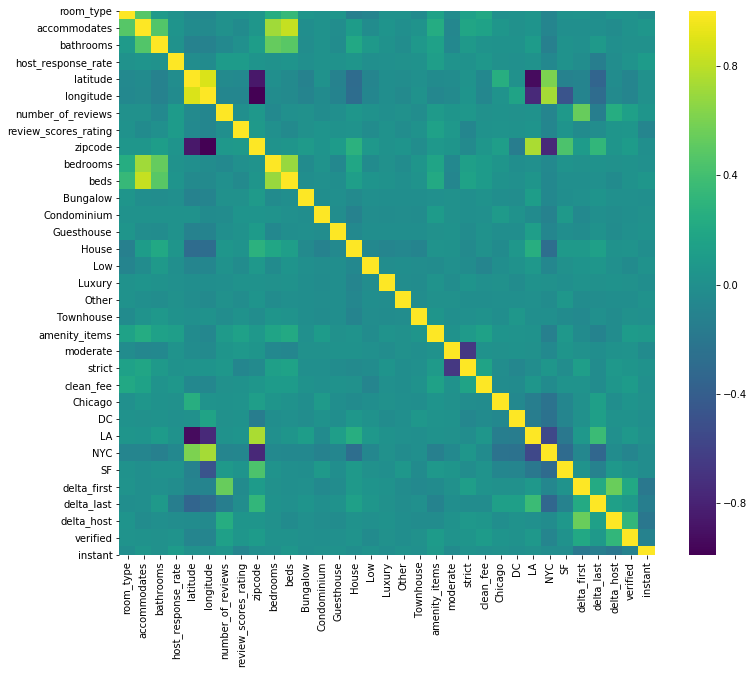

In [54]:
plt.figure(figsize=(12,10))
sns.heatmap(aircorr,cmap='viridis');

## Limpieza de Submissions

In [55]:
airsub = pd.read_csv('airbnb_submission.csv')

In [56]:
airsub.property_type = airsub.property_type.apply(lambda x : 'Luxury' if x in luxury else x)\
                                           .apply(lambda x : 'Low' if x in low else x)\
                                           .apply(lambda x : 'Other' if x in other else x)

In [57]:
airsub_prop_type = pd.get_dummies(airsub.property_type, drop_first=True)
airsub = pd.concat([airsub,airsub_prop_type],axis = 1)
airsub.drop('property_type',axis = 1,inplace = True)

In [58]:
airsub.room_type = airsub.room_type.apply(lambda x : entire[0] if x == 'Entire home/apt' else x)\
                                   .apply(lambda x : private[0] if x == 'Private room' else x)\
                                   .apply(lambda x : shared[0] if x == 'Shared room' else x)

In [59]:
airsub.amenities = airsub.amenities.str.replace('"translation missing: en.hosting_amenity_49"','')\
                             .str.replace('"translation missing: en.hosting_amenity_50"','').str.split(',')
amensub = pd.DataFrame(airsub.amenities.apply(lambda x : len(x)))
amensub.columns = ['amenity_items']
airsub = pd.concat([airsub,amensub],axis = 1)
airsub.drop('amenities',axis = 1, inplace = True)

In [60]:
airsub.drop('bed_type',axis = 1, inplace = True)

In [61]:
airsub.cancellation_policy = airsub.cancellation_policy.str.replace('super_strict_30','strict')\
                             .str.replace('super_strict_60','strict')

In [62]:
airsub_canc_pol = pd.get_dummies(airsub.cancellation_policy, drop_first=True)
airsub = pd.concat([airsub,airsub_canc_pol],axis = 1)
airsub.drop('cancellation_policy',axis = 1,inplace = True)

In [63]:
airsub_clean_fee = pd.get_dummies(airsub.cleaning_fee, drop_first=True)
airsub = pd.concat([airsub,airsub_clean_fee],axis = 1)
airsub.drop('cleaning_fee',axis = 1,inplace = True)

In [64]:
airsub_city = pd.get_dummies(airsub.city, drop_first=True)
airsub = pd.concat([airsub,airsub_city],axis = 1)
airsub.drop('city',axis = 1,inplace = True)

In [65]:
airsub.drop('description',axis = 1, inplace = True)

In [66]:
airsub['today'] = pd.Timestamp.today()

In [67]:
airsub['delta_first'] = (airsub.today - pd.to_datetime(airsub.first_review) )/np.timedelta64(1,'Y')

In [68]:
airsub['delta_last'] = (airsub.today - pd.to_datetime(airsub.last_review) )/np.timedelta64(1,'Y')

In [69]:
airsub['delta_host'] = (airsub.today - pd.to_datetime(airsub.host_since) )/np.timedelta64(1,'Y')

In [70]:
airsub.drop(['first_review','host_since','last_review','today','id'],axis = 1, inplace = True)

In [71]:
airsub.host_response_rate = airsub.host_response_rate.apply(lambda x : float(x.split('%')[0])/100)

In [72]:
airsub.drop('host_has_profile_pic',axis = 1, inplace = True)

In [73]:
airsub_verified = pd.get_dummies(airsub.host_identity_verified, drop_first = True)
airsub_verified.columns = ['verified']
airsub = pd.concat([airsub,airsub_verified],axis = 1)
airsub.drop('host_identity_verified',axis = 1,inplace = True)

In [74]:
airsub_instant = pd.get_dummies(airsub.instant_bookable, drop_first = True)
airsub_instant.columns = ['instant']
airsub = pd.concat([airsub,airsub_instant],axis = 1)
airsub.drop('instant_bookable',axis = 1,inplace = True)

In [75]:
airsub.drop('name',axis = 1, inplace = True)

In [76]:
airsub.drop('neighbourhood',axis = 1, inplace = True)

In [77]:
airsub.drop('thumbnail_url',axis = 1, inplace = True)

In [78]:
airsub.zipcode = airsub.zipcode.apply(lambda x : re.findall('^\d+',x)).apply(lambda x : pd.to_numeric(x[0]))

In [79]:
airsub.head()

,room_type,accommodates,bathrooms,host_response_rate,latitude,longitude,number_of_reviews,review_scores_rating,zipcode,bedrooms,...,Chicago,DC,LA,NYC,SF,delta_first,delta_last,delta_host,verified,instant
0,1.0,8,3.5,1.0,33.880809,-118.387797,5,96.0,90266,4.0,...,0,0,1,0,0,3.193483,2.637688,5.005977,1,0
1,1.0,2,1.0,1.0,33.864526,-118.387020,11,96.0,90254,0.0,...,0,0,1,0,0,2.785535,2.593881,5.411187,1,1
2,1.0,11,1.0,1.0,42.379616,-71.028836,29,85.0,2128,4.0,...,0,0,0,0,0,2.711611,2.180457,3.486439,1,1
3,1.0,3,1.0,1.0,34.048905,-118.465482,50,98.0,90049,1.0,...,0,0,1,0,0,4.357093,2.602095,4.789683,1,0
4,1.0,4,1.0,1.0,38.894259,-76.996380,61,96.0,20002,2.0,...,0,1,0,0,0,4.066875,2.591143,5.997100,1,0


In [80]:
airsub.shape

(9625, 33)

### Modelo de Regresión Lineal con 33 columnas.

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.feature_selection import RFE

In [82]:
X_air_train, X_air_test, y_air_train, y_air_test = train_test_split(X_air, y_air, test_size = 0.2)

In [83]:
linreg = LinearRegression().fit(X_air_train,y_air_train)
y_pred = linreg.predict(X_air_test)

In [84]:
mse(y_air_test, y_pred)

7414.308287122296

In [85]:
rmse_t=mse(y_air_test, y_pred)**0.5
rmse_t

86.10637773778605

#### Entrenamiento con toda la data

In [87]:
linregfull = LinearRegression().fit(X_air,y_air)

In [88]:
y_pred_sub_full = linregfull.predict(airsub)

In [89]:
subEGHM = pd.DataFrame(range(len(y_pred_sub_full)))
subEGHM.columns = ['id']
price = pd.DataFrame(y_pred_sub_full, columns = ['price'])
subEGHM = subEGHM.join(price)

In [ ]:
#subEGHM.to_csv('y_pred_EGHM.csv', index = False)

### Modelo de Regresión Lineal con Recursive Feature Elimination, a 12 columnas.

In [90]:
modelo = LinearRegression()
selector=RFE(modelo, n_features_to_select=12, step=1)
selector.fit(X_air, y_air)
print (selector.ranking_)

[ 1  4  1 11  1  1 20 14 21  1  5 12  2  9 16  1  1 13 10 18 17  8  7  1
  1  1  1  1 19  3 22 15  6]


In [91]:
selec = [X_air.columns[i] for i,e in enumerate(selector.support_) if e]

In [92]:
X_air_selector = X_air[[*selec]]
X_air_selector

,room_type,bathrooms,latitude,longitude,bedrooms,Low,Luxury,Chicago,DC,LA,NYC,SF
0,1.000000,1.0,40.766115,-73.989040,3.0,0,0,0,0,0,1,0
1,0.413769,1.0,37.753164,-122.429526,1.0,0,0,0,0,0,0,1
2,1.000000,1.0,34.046737,-118.260439,1.0,0,0,0,0,1,0,0
3,0.413769,1.0,37.781128,-122.501095,1.0,0,0,0,0,0,0,1
4,0.413769,1.0,40.723883,-73.983880,1.0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
28872,0.413769,1.0,40.740904,-74.002948,1.0,0,0,0,0,0,1,0
28873,0.265908,3.0,34.199671,-118.618070,1.0,0,1,0,0,1,0,0
28874,1.000000,1.0,37.789989,-122.407384,1.0,0,0,0,0,0,0,1
28875,1.000000,2.0,33.871549,-118.396053,2.0,0,0,0,0,1,0,0


In [93]:
X_air_train_selector, X_air_test_selector, y_air_train, y_air_test = train_test_split(X_air_selector, y_air, test_size = 0.2)

In [94]:
linreg_sel = LinearRegression().fit(X_air_train_selector,y_air_train)
y_pred_sel = linreg_sel.predict(X_air_test_selector)

In [95]:
mse(y_air_test, y_pred_sel)

8756.093130446734

In [96]:
rmse_t=mse(y_air_test, y_pred_sel)**0.5
rmse_t

93.57399815358289

In [98]:
linregfull_sel = LinearRegression().fit(X_air_selector,y_air)

In [99]:
airsub = airsub[[*selec]]

In [100]:
y_pred_sub_sel = linregfull_sel.predict(airsub)

In [101]:
subEGHM = pd.DataFrame(range(len(y_pred_sub_sel)))
subEGHM.columns = ['id']
price = pd.DataFrame(y_pred_sub_sel, columns = ['price'])
subEGHM = subEGHM.join(price)

In [ ]:
#subEGHM.to_csv('y_pred_EGHM_sel.csv', index = False)